In [ ]:
# Unsupervized_learning algorithms

In [ ]:
# K-means Clustering

In [ ]:
'''
clustering is similar to classification
the algorithm used is K-means(grouping n-observations into groups)
picks centroids
k-nearest grouping

K-means algorithm picks data close to the centroids(center of a cluster)
the value of k depends on the situation we are working with.

'''


In [ ]:
# THE ELBOW METHOD

In [50]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [51]:
dataset = pd.read_csv('C:/Users/HP/Desktop/DSN AI_Everyday 2024/INTERMEDIATE/Unsupervised learning - Day 5-20240301T093032Z-001/Unsupervised learning - Day 5/Mall_Customers.csv')

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [54]:
print(dataset.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [55]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
dataset.rename({'Genre': 'Gender'}, axis = 1, inplace=True)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

dataset['Gender']=le.fit_transform(dataset['Gender'])

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [59]:
dataset['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [60]:
type(dataset['Gender'])

pandas.core.series.Series

In [61]:
le.inverse_transform([1])

array(['Male'], dtype=object)

<AxesSubplot:title={'center':'Count of Males & Females'}, xlabel='Gender', ylabel='count'>

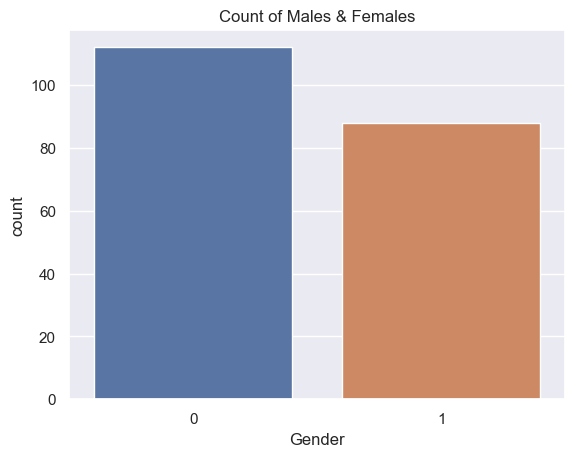

In [62]:
plt.title('Count of Males & Females')
sns.set(style='darkgrid')
sns.countplot(x = dataset['Gender'])

In [63]:
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


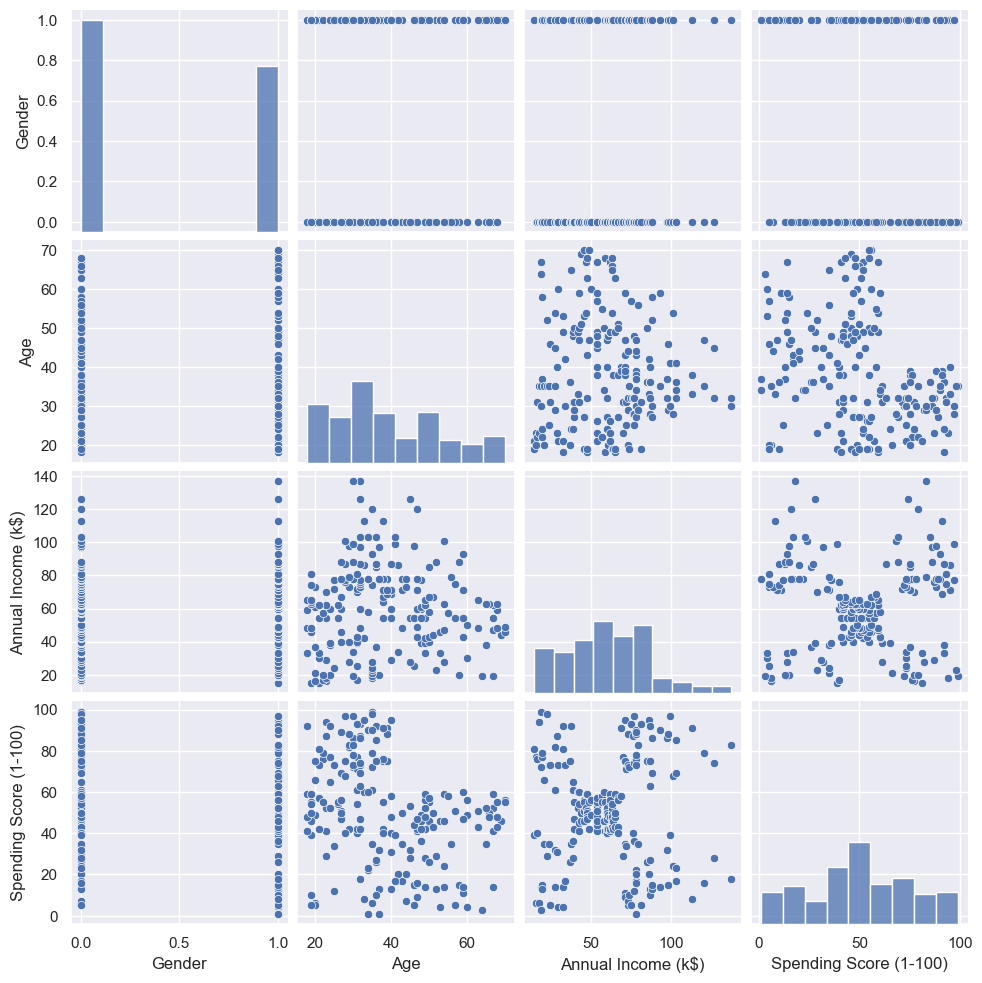

In [64]:
sns.pairplot(dataset.iloc[:,1:5])

In [65]:
x = dataset.iloc[:, [3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [66]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# what's the best value of k will you use as a data sciemtist???

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


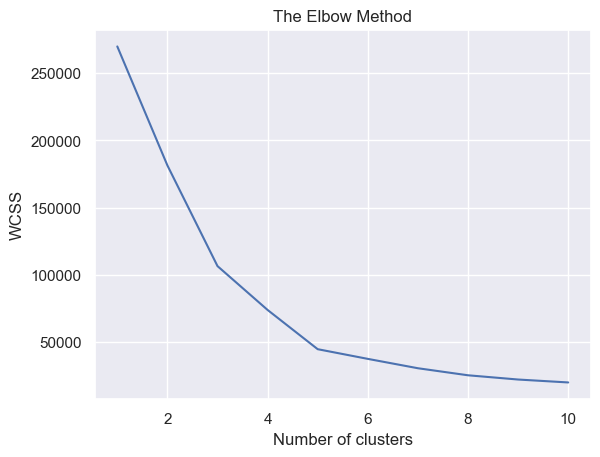

In [67]:
# using the elbow method
from sklearn.cluster import KMeans
wcss = []
for i in  range(1,11): # test 1 to 10 different clusters
# Loop over the indented statement10 times to see how distance reduces till it becomes steady
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =42)
    kmeans.fit(x) # train the model for all the 10 clusters and append into wcss list
    
    '''kmeans.fit(x) generates the following parameters:
    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distance)
    inertia: Sum of squared distances of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) # add each sum of squared dustance to wcss[] list
    
plt.plot(range(1, 11), wcss) # plot the ten different wcss againstthe numbers of cluster
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
# fitting k-means to the dataset and predicting the clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
# The predicted cluster centers are stored in y_means

In [70]:
# adding the predicted clusters
x['Centroids'] = y_kmeans

# now different observation has been assigned to different cluster centers (centroids)
x

C:\Users\HP\AppData\Local\Temp\ipykernel_15416\893904567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Centroids'] = y_kmeans


,Annual Income (k$),Spending Score (1-100),Centroids
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


# Visualizing the clusters

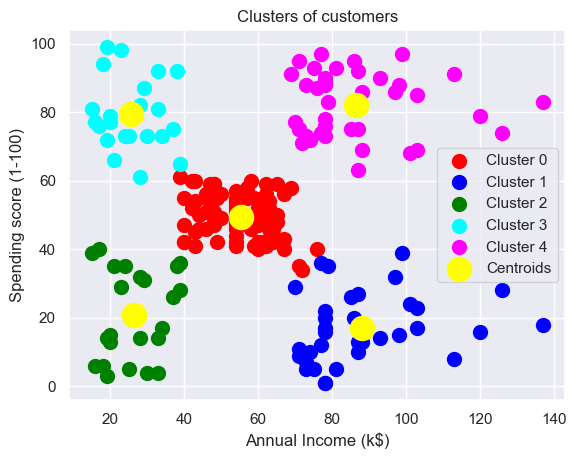

In [71]:
# unzip all values for all column in x DataFrame and store them in x(array)
x = x.values

# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in x, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend() # show labels in all scatter plots as legend
plt.show()

In [82]:
x

array([[ 15,  39,   2],
       [ 15,  81,   3],
       [ 16,   6,   2],
       [ 16,  77,   3],
       [ 17,  40,   2],
       [ 17,  76,   3],
       [ 18,   6,   2],
       [ 18,  94,   3],
       [ 19,   3,   2],
       [ 19,  72,   3],
       [ 19,  14,   2],
       [ 19,  99,   3],
       [ 20,  15,   2],
       [ 20,  77,   3],
       [ 20,  13,   2],
       [ 20,  79,   3],
       [ 21,  35,   2],
       [ 21,  66,   3],
       [ 23,  29,   2],
       [ 23,  98,   3],
       [ 24,  35,   2],
       [ 24,  73,   3],
       [ 25,   5,   2],
       [ 25,  73,   3],
       [ 28,  14,   2],
       [ 28,  82,   3],
       [ 28,  32,   2],
       [ 28,  61,   3],
       [ 29,  31,   2],
       [ 29,  87,   3],
       [ 30,   4,   2],
       [ 30,  73,   3],
       [ 33,   4,   2],
       [ 33,  92,   3],
       [ 33,  14,   2],
       [ 33,  81,   3],
       [ 34,  17,   2],
       [ 34,  73,   3],
       [ 37,  26,   2],
       [ 37,  75,   3],
       [ 38,  35,   2],
       [ 38,  92

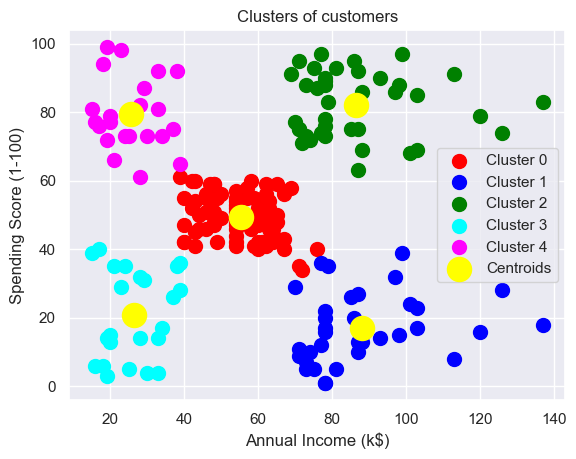

In [94]:
# visualizing the clusters from DataFrame x

# for datapoints in cluster 0
Income_Cluster_0 = x[kmeans.labels_ == 0][:, 0]  # Assuming the first column is 'Annual Income (k$)'
Spending_Score_Cluster_0 = x[kmeans.labels_ == 0][:, 1]  # Assuming the second column is 'Spending Score (1-100)'
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s=100, c='red', label='Cluster 0')

# for datapoints in cluster 1
Income_Cluster_1 = x[kmeans.labels_ == 1][:, 0]
Spending_Score_Cluster_1 = x[kmeans.labels_ == 1][:, 1]
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s=100, c='blue', label='Cluster 1')

# for datapoints in cluster 2
Income_Cluster_2 = x[kmeans.labels_ == 2][:, 0]
Spending_Score_Cluster_2 = x[kmeans.labels_ == 2][:, 1]
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s=100, c='green', label='Cluster 2')

# for datapoints in cluster 3
Income_Cluster_3 = x[kmeans.labels_ == 3][:, 0]
Spending_Score_Cluster_3 = x[kmeans.labels_ == 3][:, 1]
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s=100, c='cyan', label='Cluster 3')

# for datapoints in cluster 4
Income_Cluster_4 = x[kmeans.labels_ == 4][:, 0]
Spending_Score_Cluster_4 = x[kmeans.labels_ == 4][:, 1]
plt.scatter(Income_Cluster_4, Spending_Score_Cluster_4, s=100, c='magenta', label='Cluster 4')

# plot all cluster centroids on their converged datapoints
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Give the figure a title called clusters of customers
plt.title('Clusters of customers')

# Name the x-axis as Annual Income (k$)
plt.xlabel('Annual Income (k$)')

# Name the y-axis as Spending Score (1-100)
plt.ylabel('Spending Score (1-100)')

# print all labels in various scatter plots
plt.legend()

# show all the plots
plt.show()

In [77]:
# ASSIGNMENT

# WHAT CAN YOU INFER FROM THE PLOT ABOVE

'''
From the plot shown above, the following can be inferred:
we have five groups of customers:
those who earn a lot and spends a lot
those who earn a lot and spends little
those who earn little and spends little
those who earn little and spends a lot
those who earns considerately and spend considerately.

others are:
1. The cluster with blue full of high spending score has high income
2. The cluster are close to the centroids in cluster1
3. There are some outliers
'''

'\nFrom the plot shown above, the following can be inferred:\nwe have five groups of customers:\nthose who earn a lot and spends a lot\nthose who earn a lot and spends little\nthose who earn little and spends little\nthose who earn little and spends a lot\nthose who earns considerately and spend considerately.\n\nothers are:\n1. The cluster with blue full of high spending score has high income\n2. The cluster are close to the centroids in cluster1\n3. There are some outliers\n'